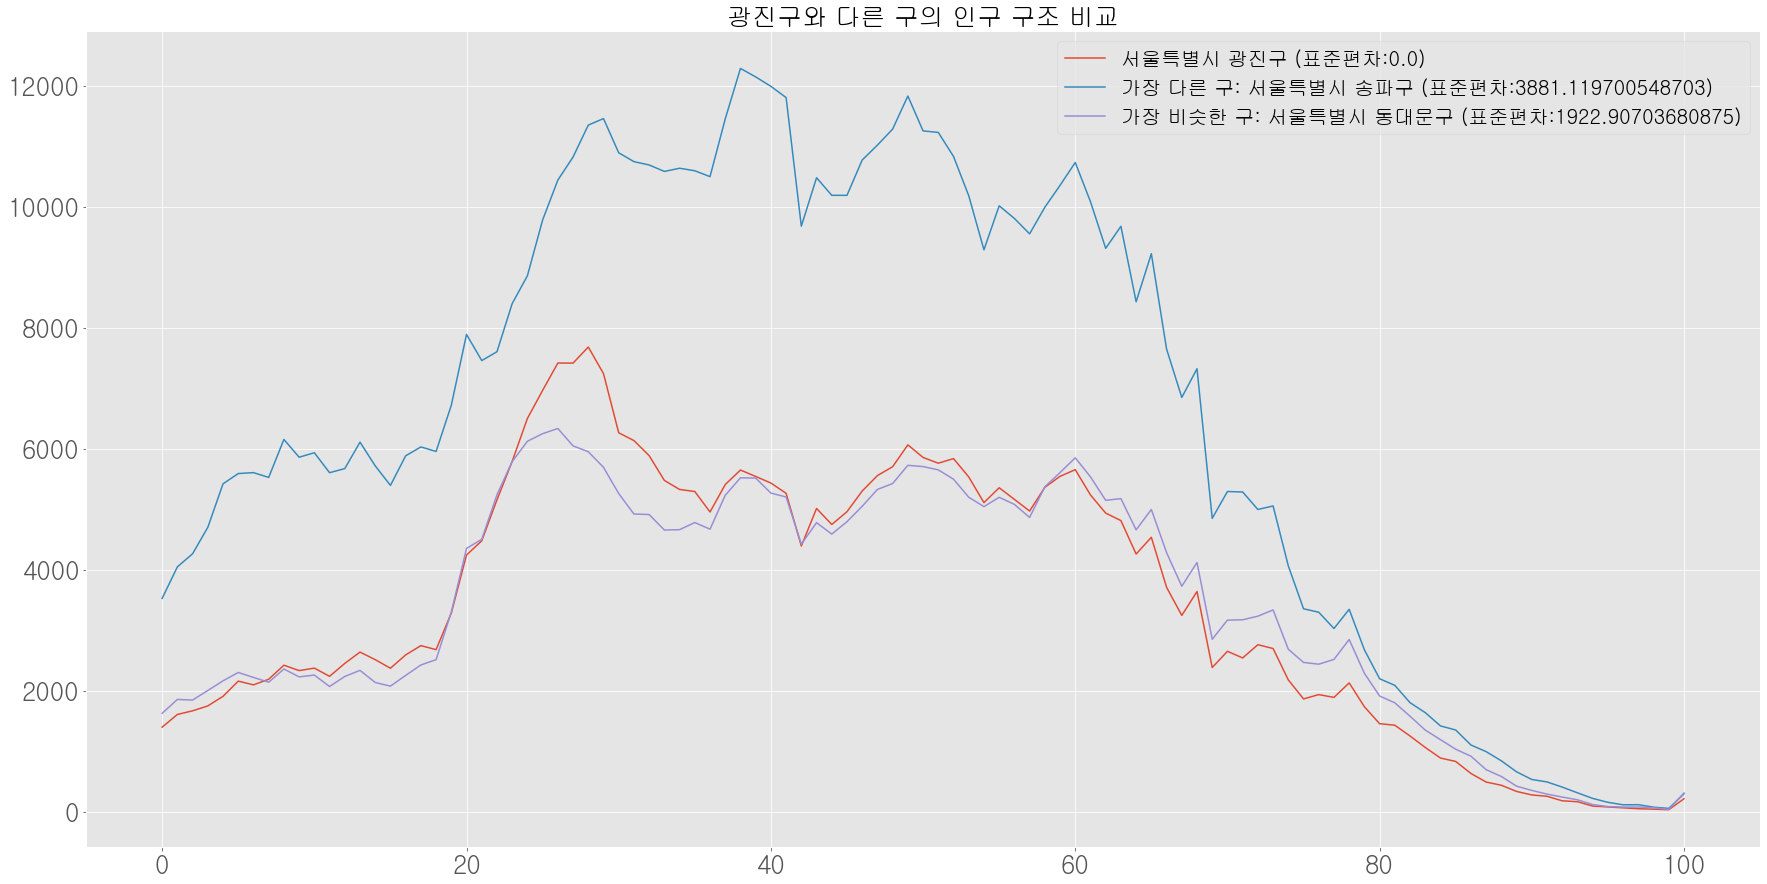

In [1]:
#실습 문제 1

import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('age.csv')

 
diffMax = 0
diffMin = 100000000000000

maxidx = 0
minidx = 0
maxV = 0
minV = 0
maxSD = 0
minSD = 0


cmpdata = np.array(data.loc[5,"0세":"100세 이상"])

for i in range (101):
    cmpdata[i] = int(cmpdata[i].replace(',',''))
for i in range (1,26):
    if i != 5:
        data1 = np.array(data.loc[i,"0세":"100세 이상"])
        for j in range (101):
            data1[j] = int(data1[j].replace(',',''))
        dif = cmpdata - data1
        sd = np.dot(dif,dif.T)
        if sd > diffMax:
            diffMax = sd
            maxidx = i
        if sd < diffMin:
            diffMin = sd
            minidx = i
        
maxdata = np.array(data.loc[maxidx,"0세":"100세 이상"])
for i in range (101):
    maxdata[i] = int(maxdata[i].replace(',',''))
maxAvg = maxdata.sum() / 101
for i in range (101):
    maxV += (maxdata[i] - maxAvg)**(2)
maxSD = (maxV/101)**(1/2)

mindata = np.array(data.loc[minidx,"0세":"100세 이상"])
for i in range (101):
    mindata[i] = int(mindata[i].replace(',',''))
minAvg = mindata.sum() / 101
for i in range (101):
    minV += (mindata[i] - minAvg)**(2)
minSD = (minV/101)**(1/2)

plt.style.use('ggplot')
plt.figure(figsize=(30,15))
plt.rcParams["font.family"] = "Gulim"
plt.rc('legend', fontsize=20)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.title("광진구와 다른 구의 인구 구조 비교", fontsize= 25)
plt.plot(cmpdata, label=data.loc[5,"행정기관"]+"(표준편차:0.0)")
plt.plot(maxdata, label="가장 다른 구: "+data.loc[maxidx,"행정기관"]+"(표준편차:"+str(maxSD)+")")
plt.plot(mindata, label="가장 비슷한 구: "+data.loc[minidx,"행정기관"]+"(표준편차:"+str(minSD)+")")
plt.legend()
plt.show()